[![open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVA-DS-6050/DS6050---FA24/blob/main/live_sessions/module-1/Module_1_Live_Coding_Session.ipynb)

# Introduction

In this session, we will explore different tensor operations using a dummy dataset. We will look at the different API in tensorflow and keras to build some familiarity with using them.



### Step 1: Configure the environment
- Installing and loading required modules


In [2]:
# !pip install keras
# !pip install tensorflow
import numpy as np
import tensorflow as tf
import keras

In [29]:
!python --version
print(tf.__version__)
print(keras.__version__)

Python 3.11.8
2.16.1
3.0.5


### Step 2: Load Dataset

In [31]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [35]:
# Explore data
print(X_train.shape)
print(X_test.shape)

print(Y_train)

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


### Tensors
Tensorflow operates on multidimensional arrays or tensors represented as tf.Tensor objects. All tensors are immutable like Python numbers and strings i.e. you cannot update the contents of a tensor, you can only create a new one. Here's an example of a two-dimensional tensor:

In [44]:
# Create a zero-rank tensor
tf.constant(3.0) # .shape

TensorShape([])

In [55]:
# Create a 1-rank tensor
tf.constant([1.0, 2.0, 3.0]).ndim # .shape

1

In [54]:
# Create a 2-rank tensor
# tf.ones((3, 3))
tf.zeros((3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [5]:
# Create a tensor object with random numbers and print shape and data type
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]], dtype=tf.float64)

print(x) 
print(x.shape) # tells you the size of the tensor along each of it axes
print(x.dtype) # tells you the type of all the elements in the tensor

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float64)
(2, 3)
<dtype: 'float64'>


In [6]:
x[0] = tf.constant([6., 5., 4.])
x

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

![Scala, Vector and Matrices](simple-tensors.png)

![3-axis-tensorf](3-axis-tensor.png)

#### String Tensors
Tensorflow string is a dtype, which represents data as strings. String tensors are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor.

In [56]:
# Scalar string tensor
string_tensor = tf.constant("data science")
print(string_tensor)

tf.Tensor(b'data science', shape=(), dtype=string)


In [57]:
# Vector string
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "lazy dog"])
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'lazy dog'], shape=(3,), dtype=string)


### Basic Tensor Operations
Tensorflow implements mathematical operations on tensors, as well as many operations specialized for machine learning and deep learning. See examples below:

In [7]:
# element-wise addition of two tensors
x + x

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])>

In [8]:
# adding tensors to constant - broadcasting
5 + x

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[ 6.,  7.,  8.],
       [ 9., 10., 11.]])>

In [16]:
print(tf.add(x, x), '\n')

# element wise multiplication
print(tf.multiply(x, x), '\n')

# matrix multiplication
print(tf.matmul(x, tf.transpose(x)), '\n0') # Incompatible dimension 2x3 * 2x3

tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float64) 

tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float64) 

tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float64) 
0


In [41]:
# matrix multiplication with transpose [2 x 3] * [3 x 2]
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[14., 32.],
       [32., 77.]])>

In [52]:
# Concatenating list of tensors
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float64, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]])>

In [61]:
# Apply exponential normalization (softmax activation) along an axis
tf.nn.softmax(x, axis=1)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])>

In [19]:
# Sum up all elements of the tensor or along an axis - applicable in Maxpool
tf.reduce_sum(x, axis=1)
tf.reduce_max(x, axis=0)
tf.reduce_prod(x)
print(tf.math.argmax(x, axis=1))

tf.Tensor([2 2], shape=(2,), dtype=int64)


Anywhere tensorflow function expects a Tensor as input, the function will also accept anything that can be converted to a Tensor using tf.convert_to_tensor.

In [72]:
# Convert a list object to tensor
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

This can also be done automatically with tensor operations

In [74]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

Running large calculations on CPU can be slow. Tensorflow can use accelerator hardware like GPUs to execute operations very quickly

In [75]:
if tf.config.list_physical_devices('GPU'):
    print("Tensorflow **IS** using GPU")
else:
    print("Tensorflow is Not using GPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

#### Variables
Normal tf.Tensor objects are immutable. To store model weights or other mutable states in Tensorflow use a tf.Variable

In [21]:
# Initialize a variable state
var_x = tf.Variable([0.0, 0.0, 0.0, 0.0])
var_x

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [24]:
# Assign new value to the variable
var_x.assign([1, 2, 3, 4])

<tf.Variable 'UnreadVariable' shape=(4,) dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [98]:
# Update variable
var_x.assign_add([1, 1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(4,) dtype=float32, numpy=array([2., 3., 4., 5.], dtype=float32)>

#### Automatic Differentiation

Gradient descent and related algorithms are a core of deep learning and modern machine learning.
To enable this, Tensorflow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's error or loss with respect to it

In [113]:
# Evaluating a function on a tensor
def f(x):
    y = x**2 + 2*x - 5
    return y

f(var_x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.,  3., 10., 19.], dtype=float32)>

The derivative of the function $f(x)$ is $f'(x) = (2*x + 2) = 4$ Tensorflow can calculate this automatically

In [26]:
x = var_x # tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

grad_x  = tape.gradient(y, x)
grad_x#.numpy()

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 4., 6., 8.], dtype=float32)>

### Modules, Layers and models
Though for the most of this course, we will be using the keras modules, here we will explore the Tensorflow module tf.Module class and tf.function for managing and operating on variable objects. The tf.Module supports two significant features:

1. Saving and restoring the values of your variables using tf.train.Checkpoint. This is useful during training as it is quick to save and restore a model's state.
2. Importing and exporting the tf.Variable values and the function (tf.function) graphs using tf.saved_model. This allows us to run model independently of the Python program that created it.

In [35]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights') # input dim = 3, output dim = 3
bias = tf.Variable(tf.zeros(2, dtype=tf.float32), name='bias') # same as output dim
x = [[1., 2., 3.]]

In [37]:
with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + bias # Forward pass
    loss = tf.reduce_mean(y**2)

loss

<tf.Tensor: shape=(), dtype=float32, numpy=11.238832>

To get the gradient of loss wrt both variables (weights and bias), we can pass both as sources to the gradient method.

In [41]:
[dl_w, dl_b] = tape.gradient(loss, [weights, bias])
print(dl_w)
print(dl_b)

tf.Tensor(
[[  3.3295627  -3.375156 ]
 [  6.6591253  -6.750312 ]
 [  9.9886875 -10.125467 ]], shape=(3, 2), dtype=float32)
tf.Tensor([ 3.3295627 -3.375156 ], shape=(2,), dtype=float32)


The gradient wrt to each source variable has the same shape as the source variable

The tape is flexible on how sources are passed and can accept any nested combination of lists or dictionaries and return grandient structured the same way. We can also pass a dictionary of variables:

In [42]:
my_variables = {"w": weights,
             "b": bias}

grad = tape.gradient(loss, my_variables)
grad

{'w': <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[  3.3295627,  -3.375156 ],
        [  6.6591253,  -6.750312 ],
        [  9.9886875, -10.125467 ]], dtype=float32)>,
 'b': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3.3295627, -3.375156 ], dtype=float32)>}

Creating a Module

In [61]:
class testModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)
    
    @tf.function
    def multiply(self, x):
        return x * self.weight
    
mod = testModule(4)
mod.multiply(tf.constant([2, 4, 6]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 8, 16, 24])>

Save the Module

In [62]:
path = "./savedModule"
tf.saved_model.save(mod, path)

INFO:tensorflow:Assets written to: ./savedModule\assets


INFO:tensorflow:Assets written to: ./savedModule\assets


Reload saved model

In [63]:
reloaded_module = tf.saved_model.load(path)
reloaded_module.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 4,  8, 12])>

The keras wrapper modules tf.keras.layers.Layer and tf.keras.Module classes build on tf.Module providing additional functionality and convenience methods for buillding, training and saving models.

In [67]:
# Define a single layer model
class Model(tf.Module):
    def __init__(self):
        # Randomly initialize weights and bias terms
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=10)
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])
    
    @tf.function
    def __call__(self, x):
        # Define a quadratic Model
        return self.w_q* (x**2) + self.w_l * x + self.b
    
quad_model = Model()


In [71]:
# Define a loss
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

Define a basic training loop for the model. The loop makes use of MSE loss function and its gradients wrt the input in order to iteratively update the models parameters. The tf.data.Dataset API provides useful function for batching and shuffling.

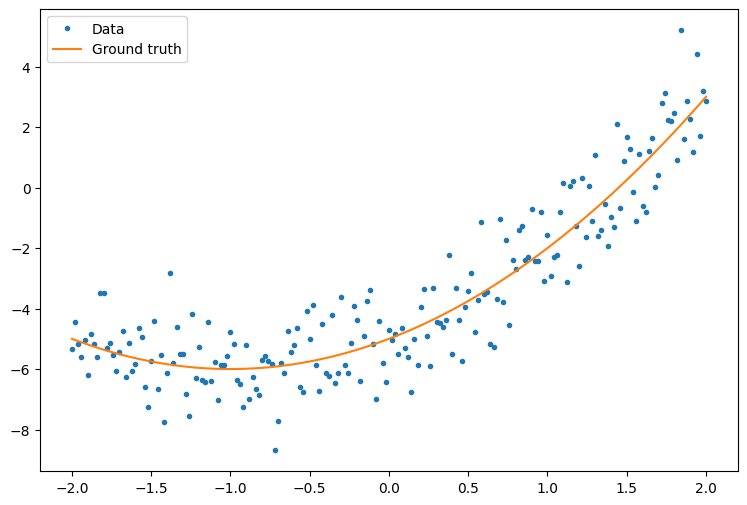

In [77]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

In [73]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 1.136
Mean squared error for step 10: 1.141
Mean squared error for step 20: 1.135
Mean squared error for step 30: 1.137
Mean squared error for step 40: 1.139
Mean squared error for step 50: 1.138
Mean squared error for step 60: 1.135
Mean squared error for step 70: 1.138
Mean squared error for step 80: 1.136
Mean squared error for step 90: 1.136




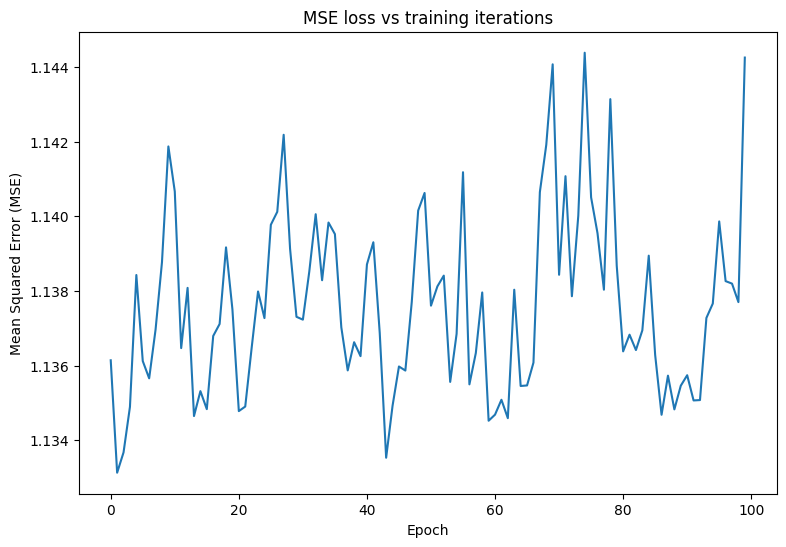

In [78]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');